In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.optimizers import Adam
import keras

In [3]:
cifar_train=pd.read_csv('../datasets/CIFR(Ass2&3)/test_data.csv')
x_train=cifar_train.drop('label',axis=1).values
y_train=cifar_train['label'].values

print(x_train.shape)
print(y_train.shape)

(10000, 3072)
(10000,)


In [4]:
cifar_test=pd.read_csv('../datasets/CIFR(Ass2&3)/train_data.csv')
x_test=cifar_test.drop('label',axis=1).values
y_test=cifar_test['label'].values

print(x_test.shape)
print(y_test.shape)

(50000, 3072)
(50000,)


In [5]:
x_train=x_train.reshape((-1,32,32,3))
x_train = x_train/255.0

x_test=x_test.reshape((-1,32,32,3))
x_test = x_test/255.0

print(x_train.shape)
print(x_test.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [6]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [8]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               921728    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923914 (3.52 MB)
Trainable params: 923914 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [9]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
H=model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
79/79 [==============================] - 4s 44ms/step - loss: 1.9768 - accuracy: 0.2889
Epoch 2/5
79/79 [==============================] - 3s 43ms/step - loss: 1.6290 - accuracy: 0.4241
Epoch 3/5
79/79 [==============================] - 3s 42ms/step - loss: 1.4655 - accuracy: 0.4843
Epoch 4/5
79/79 [==============================] - 3s 42ms/step - loss: 1.3904 - accuracy: 0.5132
Epoch 5/5
79/79 [==============================] - 3s 42ms/step - loss: 1.3074 - accuracy: 0.5409


In [10]:
model.evaluate(x_test,y_test)

2023-11-17 02:25:44.921566: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 8s 5ms/step - loss: 1.4029 - accuracy: 0.4987


[1.4029110670089722, 0.4987199902534485]

2023-11-17 02:25:54.119125: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 8s 5ms/step
Actual Label:  bird
Predicted Label:  bird


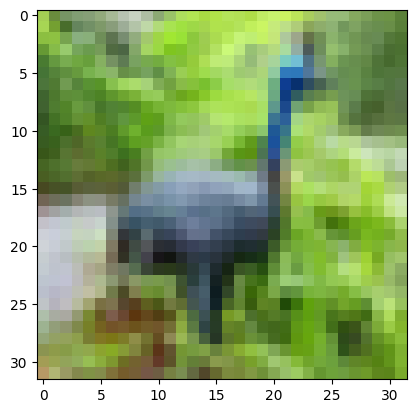

In [11]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

n=6
plt.imshow(x_test[n].reshape(32,32,3))

predictions=model.predict(x_test)

print("Actual Label: ",classes[np.argmax(y_test[n])])
print("Predicted Label: ", classes[np.argmax(predictions[n])])